<a href="https://colab.research.google.com/github/AmaniBKL/Projects-ML/blob/main/Supervised_ML_Regression_models_kc_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

I. Data preprocessing and data visualization 

In [ ]:
df = pd.read_csv('/content/kc_house_data (1).csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['price'].describe

<bound method NDFrame.describe of 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64>

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


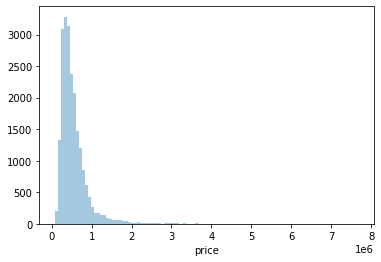

In [ ]:
sns.distplot(df['price'], bins=100, kde=False)

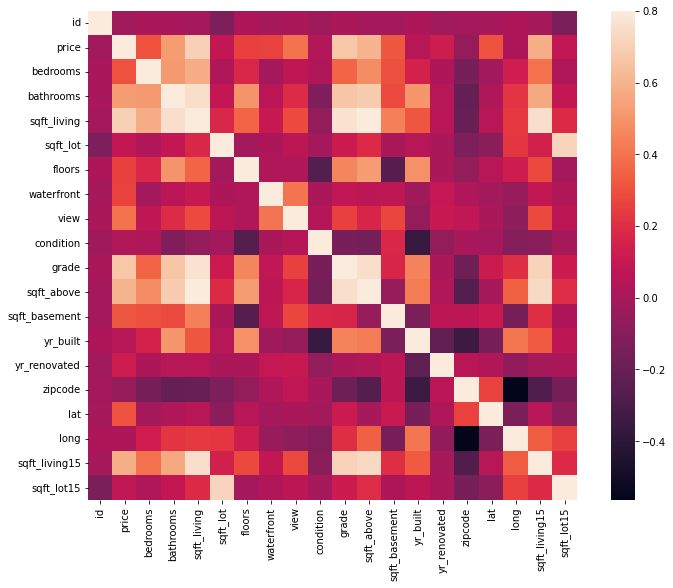

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True, vmax=.8)

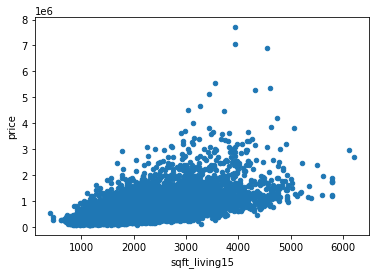

In [ ]:
df.plot.scatter(x='sqft_living15', y='price')

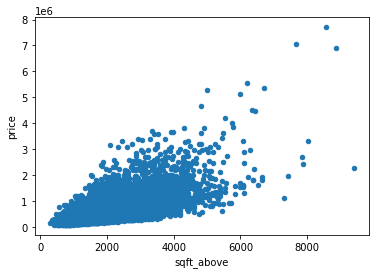

In [ ]:
df.plot.scatter(x='sqft_above', y='price')

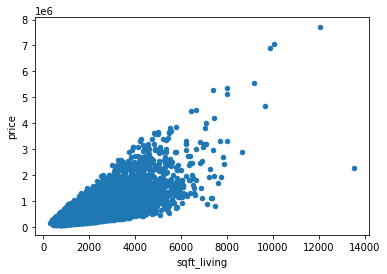

In [ ]:
df.plot.scatter(x='sqft_living', y='price')

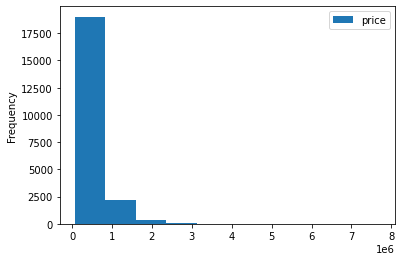

In [ ]:
df.plot.hist(x='grade', y='price')

In [ ]:
#the most important features based on heatmap and correlation between fearture price and others features are 
#sqft_living, sqft_living15, sqft_above and grade.
#these features have the highest coefficients of correlation with feature price.

II.  Linear regression

In [ ]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

lr=LinearRegression() 
lr.fit(x_train,y_train)
predicted=lr.predict(x_test) 

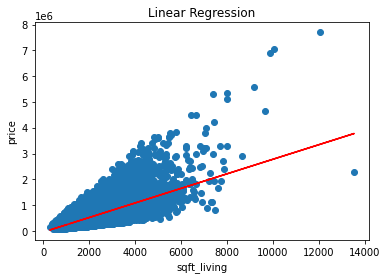

In [ ]:
plt.scatter(x,y)
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,lr.predict(x), color='r')
plt.show()

In [ ]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62451720102.954
R squared 0.5035535751151091


III. Multi-linear regression 

In [ ]:
x=df[["sqft_living","grade"]]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

lr=LinearRegression()
lr.fit(x_train,y_train)
predicted=lr.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57296260421.90227
R squared 0.54453578542216


IV. Polynomial regression

In [ ]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

lr=LinearRegression()
poly=PolynomialFeatures(degree=3)

x1=poly.fit_transform(x_train)
lr.fit(x1, y_train)

x2= poly.fit_transform(x_test)
predicted = lr.predict(x2)


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 70437891546.69485
R squared 0.5320188787249847


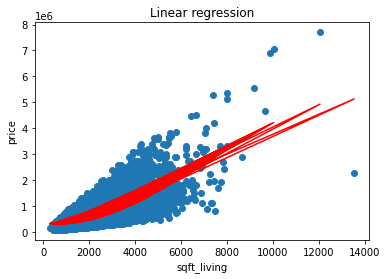

In [ ]:
plt.scatter(x, y)
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
y=lr.predict(poly.fit_transform(x))
plt.plot(x, y, color="r") 

In [ ]:
x=df[["sqft_living","grade"]]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=430)

lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x1=poly.fit_transform(x_train)
lg.fit(x1, y_train)

x2= poly.fit_transform(x_test)
predicted = lg.predict(x2)


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 61139322999.97992
R squared 0.6415289998007367
